In [ ]:
pip install lightgbm

In [1]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [2]:
base= pd.read_csv("C:/Users/MARILYN/Downloads/BaseTratada.csv")
base

,FECHA_SOL,FECHA_CONT,mth_sol,mth_cont,CONTRATO,IMPAGADOR,SEGMENTO_CLIENTE,var1,var2,var3,...,var106,var107,var108,var109,var110,var111,var112,var113,SCORE,SCORE_TRANS
0,53:57.2,09:36.8,01/09/2021,01/09/2021,1,0,G,8,16,0,...,15.0,355.00,-1.0,-1.0,0,0,35,100,0.308022,223
1,48:17.8,06:32.3,01/08/2021,01/08/2021,1,0,G,1,0,0,...,20.0,0.00,-1.0,-1.0,0,0,39,39,0.281160,227
2,53:14.9,58:18.7,01/09/2021,01/09/2021,1,1,B,40,0,0,...,20.0,-1.00,-1.0,-1.0,0,0,46,0,0.284695,227
3,50:37.4,58:26.5,01/08/2021,01/08/2021,1,0,G,4,0,0,...,30.0,-1.00,-1.0,-1.0,0,0,24,74,0.336120,220
4,46:22.7,12:43.7,01/09/2021,01/10/2021,1,0,G,18,1,2,...,0.0,-1.00,99.0,211.1,0,0,26,0,0.149582,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51656,01:31.8,28:36.8,01/05/2022,01/05/2022,1,0,G,6,129,2,...,20.0,138.00,60.0,180.0,4,18,47,258,0.240235,233
51657,51:59.6,56:15.5,01/04/2022,01/04/2022,1,1,B,4,57,0,...,30.0,426.08,171.0,171.0,0,0,27,36,0.095542,265
51658,00:51.4,07:26.2,01/04/2022,01/04/2022,1,0,G,7,0,0,...,20.0,-1.00,-1.0,-1.0,0,0,28,0,0.075937,272
51659,51:53.6,55:20.5,01/06/2022,01/06/2022,1,0,G,5,30,0,...,20.0,190.00,247.0,247.0,1,5,35,74,0.212272,238


In [3]:
Data=base[base['CONTRATO']==True] #Subconjunto de datos de aquellos que tienen contrato.
Dat=Data[Data['SEGMENTO_CLIENTE'] != "SS"]
Data1=Dat[Dat['SEGMENTO_CLIENTE'] != "I"]
Data1

,FECHA_SOL,FECHA_CONT,mth_sol,mth_cont,CONTRATO,IMPAGADOR,SEGMENTO_CLIENTE,var1,var2,var3,...,var106,var107,var108,var109,var110,var111,var112,var113,SCORE,SCORE_TRANS
0,53:57.2,09:36.8,01/09/2021,01/09/2021,1,0,G,8,16,0,...,15.0,355.00,-1.0,-1.0,0,0,35,100,0.308022,223
1,48:17.8,06:32.3,01/08/2021,01/08/2021,1,0,G,1,0,0,...,20.0,0.00,-1.0,-1.0,0,0,39,39,0.281160,227
2,53:14.9,58:18.7,01/09/2021,01/09/2021,1,1,B,40,0,0,...,20.0,-1.00,-1.0,-1.0,0,0,46,0,0.284695,227
3,50:37.4,58:26.5,01/08/2021,01/08/2021,1,0,G,4,0,0,...,30.0,-1.00,-1.0,-1.0,0,0,24,74,0.336120,220
4,46:22.7,12:43.7,01/09/2021,01/10/2021,1,0,G,18,1,2,...,0.0,-1.00,99.0,211.1,0,0,26,0,0.149582,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51656,01:31.8,28:36.8,01/05/2022,01/05/2022,1,0,G,6,129,2,...,20.0,138.00,60.0,180.0,4,18,47,258,0.240235,233
51657,51:59.6,56:15.5,01/04/2022,01/04/2022,1,1,B,4,57,0,...,30.0,426.08,171.0,171.0,0,0,27,36,0.095542,265
51658,00:51.4,07:26.2,01/04/2022,01/04/2022,1,0,G,7,0,0,...,20.0,-1.00,-1.0,-1.0,0,0,28,0,0.075937,272
51659,51:53.6,55:20.5,01/06/2022,01/06/2022,1,0,G,5,30,0,...,20.0,190.00,247.0,247.0,1,5,35,74,0.212272,238


In [4]:
VarC=list(Data1.select_dtypes(include=["int","float"]).columns) #Variables continuas.
VarC

['CONTRATO',
 'IMPAGADOR',
 'var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'var7',
 'var8',
 'var9',
 'var10',
 'var11',
 'var12',
 'var13',
 'var14',
 'var15',
 'var16',
 'var17',
 'var18',
 'var19',
 'var20',
 'var21',
 'var22',
 'var23',
 'var24',
 'var25',
 'var26',
 'var27',
 'var28',
 'var29',
 'var30',
 'var31',
 'var32',
 'var33',
 'var34',
 'var35',
 'var36',
 'var37',
 'var38',
 'var39',
 'var40',
 'var41',
 'var42',
 'var43',
 'var44',
 'var45',
 'var46',
 'var47',
 'var48',
 'var49',
 'var50',
 'var51',
 'var52',
 'var53',
 'var54',
 'var55',
 'var56',
 'var57',
 'var58',
 'var59',
 'var60',
 'var61',
 'var62',
 'var63',
 'var64',
 'var65',
 'var66',
 'var67',
 'var68',
 'var69',
 'var70',
 'var71',
 'var72',
 'var73',
 'var74',
 'var75',
 'var76',
 'var77',
 'var78',
 'var79',
 'var80',
 'var81',
 'var82',
 'var83',
 'var84',
 'var85',
 'var86',
 'var87',
 'var88',
 'var89',
 'var90',
 'var91',
 'var92',
 'var93',
 'var94',
 'var95',
 'var96',
 'var97',
 'var98',
 '

In [5]:
VarD=list(Data1.select_dtypes(include=["object", "bool"]).columns) #Variables discretas.
VarD

['FECHA_SOL', 'FECHA_CONT', 'mth_sol', 'mth_cont', 'SEGMENTO_CLIENTE']

In [14]:
VarB=["CONTRATO"]
#for i in VarB:
 #   VarD.remove(i)

In [15]:
def tabla_distribucion_variable(df,var): 
    tabla = df[var].value_counts(1).reset_index()
    tabla.columns=[var,"frecuencia"]
    tabla["frecuencia acumulada"]= tabla["frecuencia"].cumsum()
    tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
    return tabla

for i in VarC:
    print(tabla_distribucion_variable(Data1,i))

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

  CONTRATO  frecuencia  frecuencia acumulada
0        1         1.0                   1.0
1  Ausente         0.0                   1.0
  IMPAGADOR  frecuencia  frecuencia acumulada
0         0     0.84288               0.84288
1         1     0.15712               1.00000
2   Ausente     0.00000               1.00000
        var1  frecuencia  frecuencia acumulada
0          2    0.136292              0.136292
1          1    0.122026              0.258319
2          3    0.108244              0.366563
3          4    0.086351              0.452914
4          5    0.070498              0.523412
..       ...         ...                   ...
199      140    0.000019              0.999942
200      249    0.000019              0.999961
201      170    0.000019              0.999981
202      132    0.000019              1.000000
203  Ausente    0.000000              1.000000

[204 rows x 3 columns]
        var2  frecuencia  frecuencia acumulada
0          0    0.274811              0.274811

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

        var44  frecuencia  frecuencia acumulada
0       20000    0.074273              0.074273
1       10000    0.037765              0.112038
2        2000    0.029636              0.141674
3        6000    0.028958              0.170632
4        5000    0.027584              0.198215
...       ...         ...                   ...
5493    29646    0.000019              0.999942
5494    15595    0.000019              0.999961
5495   300190    0.000019              0.999981
5496   310600    0.000019              1.000000
5497  Ausente    0.000000              1.000000

[5498 rows x 3 columns]
         var45  frecuencia  frecuencia acumulada
0            0    0.008459              0.008459
1        10000    0.005923              0.014382
2         5000    0.005401              0.019783
3        30000    0.002710              0.022493
4         2000    0.002497              0.024990
...        ...         ...                   ...
31136    23070    0.000019              0.999942
31137  

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

         var85  frecuencia  frecuencia acumulada
0            0    0.103231              0.103231
1            1    0.001471              0.104702
2          348    0.000755              0.105457
3          549    0.000697              0.106154
4         1000    0.000658              0.106812
...        ...         ...                   ...
28833    26148    0.000019              0.999942
28834     4190    0.000019              0.999961
28835     1715    0.000019              0.999981
28836    15583    0.000019              1.000000
28837  Ausente    0.000000              1.000000

[28838 rows x 3 columns]
        var86  frecuencia  frecuencia acumulada
0        -1.0    0.599872              0.599872
1       20.99    0.003697              0.603569
2       40.57    0.003504              0.607073
3       45.14    0.003368              0.610441
4       36.93    0.002574              0.613016
...       ...         ...                   ...
9817    59.25    0.000019              0.999942
98

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)


In [16]:
Data1.loc[:,VarC]=Data1[VarC].fillna(-1)

In [17]:
for i in VarC:
    print(tabla_distribucion_variable(Data1,i))

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

  CONTRATO  frecuencia  frecuencia acumulada
0        1         1.0                   1.0
1  Ausente         0.0                   1.0
  IMPAGADOR  frecuencia  frecuencia acumulada
0         0     0.84288               0.84288
1         1     0.15712               1.00000
2   Ausente     0.00000               1.00000
        var1  frecuencia  frecuencia acumulada
0          2    0.136292              0.136292
1          1    0.122026              0.258319
2          3    0.108244              0.366563
3          4    0.086351              0.452914
4          5    0.070498              0.523412
..       ...         ...                   ...
199      140    0.000019              0.999942
200      249    0.000019              0.999961
201      170    0.000019              0.999981
202      132    0.000019              1.000000
203  Ausente    0.000000              1.000000

[204 rows x 3 columns]
        var2  frecuencia  frecuencia acumulada
0          0    0.274811              0.274811

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

           var41  frecuencia  frecuencia acumulada
0           -1.0    0.604963              0.604963
1           14.0    0.001355              0.606318
2            7.0    0.000910              0.607228
3           28.0    0.000910              0.608138
4           11.0    0.000832              0.608970
...          ...         ...                   ...
9276   74.069444    0.000019              0.999942
9277      103.25    0.000019              0.999961
9278    8.166666    0.000019              0.999981
9279  145.166667    0.000019              1.000000
9280     Ausente    0.000000              1.000000

[9281 rows x 3 columns]
      var42  frecuencia  frecuencia acumulada
0        20    0.233426              0.233426
1        19    0.136970              0.370395
2        18    0.100211              0.470606
3        17    0.088210              0.558816
4        16    0.067401              0.626217
5        15    0.047676              0.673893
6        14    0.047231              0.72

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

        var78  frecuencia  frecuencia acumulada
0       100.0    0.087339              0.087339
1        50.0    0.069937              0.157275
2        75.0    0.057413              0.214688
3       66.67    0.046011              0.260700
4        80.0    0.036004              0.296704
...       ...         ...                   ...
2528    84.49    0.000019              0.999942
2529    53.69    0.000019              0.999961
2530    78.35    0.000019              0.999981
2531     55.3    0.000019              1.000000
2532  Ausente    0.000000              1.000000

[2533 rows x 3 columns]
        var79  frecuencia  frecuencia acumulada
0         0.0    0.098004              0.098004
1        50.0    0.069937              0.167941
2        25.0    0.057413              0.225354
3       33.33    0.046011              0.271365
4        20.0    0.036004              0.307369
...       ...         ...                   ...
2527    60.24    0.000019              0.999942
2528    15.51  

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [18]:
for i in VarD:
    Data1[i].fillna("Missing",inplace=True)

In [19]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

      FECHA_SOL  frecuencia  frecuencia acumulada
0       04:46.2    0.000174              0.000174
1       43:55.8    0.000174              0.000348
2       31:17.9    0.000155              0.000503
3       29:12.1    0.000155              0.000658
4       41:46.1    0.000155              0.000813
...         ...         ...                   ...
27472   23:20.9    0.000019              0.999942
27473   48:24.7    0.000019              0.999961
27474   51:23.3    0.000019              0.999981
27475   00:51.4    0.000019              1.000000
27476   Ausente    0.000000              1.000000

[27477 rows x 3 columns]
      FECHA_CONT  frecuencia  frecuencia acumulada
0        50:43.9    0.000174              0.000174
1        39:25.4    0.000155              0.000329
2        22:50.5    0.000155              0.000484
3        30:23.5    0.000155              0.000639
4        12:47.4    0.000155              0.000794
...          ...         ...                   ...
27476    36:40.7 

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [20]:
for i in VarB:#Ciclo según las variables en la lista VarB
    Data1[i] = Data1[i].fillna("FALSE").astype(bool) #Se cambian los valores de Data1 de las variables según VarB. El registro se vuelve entero desde una escala de -1.



In [21]:
for i in VarB:
    print(tabla_distribucion_variable(Data1,i))

  CONTRATO  frecuencia  frecuencia acumulada
0     True         1.0                   1.0
1  Ausente         0.0                   1.0


C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)


In [22]:
def agrupar_categorias(df,VarDisc):
    for i in VarDisc:
        if i in df.columns:
            if df[i].nunique()>20:
                categorias_comunes = df[i].value_counts().index[:20] #Tomar las 20 categorías más comunes.
                df[i]=df[i].apply(lambda x: x if x in categorias_comunes else 'Other')
    return df
Data1= agrupar_categorias(Data1,VarD)
Data1

,FECHA_SOL,FECHA_CONT,mth_sol,mth_cont,CONTRATO,IMPAGADOR,SEGMENTO_CLIENTE,var1,var2,var3,...,var106,var107,var108,var109,var110,var111,var112,var113,SCORE,SCORE_TRANS
0,Other,Other,01/09/2021,01/09/2021,True,0,G,8,16,0,...,15.0,355.00,-1.0,-1.0,0,0,35,100,0.308022,223
1,Other,Other,01/08/2021,01/08/2021,True,0,G,1,0,0,...,20.0,0.00,-1.0,-1.0,0,0,39,39,0.281160,227
2,Other,Other,01/09/2021,01/09/2021,True,1,B,40,0,0,...,20.0,-1.00,-1.0,-1.0,0,0,46,0,0.284695,227
3,Other,Other,01/08/2021,01/08/2021,True,0,G,4,0,0,...,30.0,-1.00,-1.0,-1.0,0,0,24,74,0.336120,220
4,Other,Other,01/09/2021,01/10/2021,True,0,G,18,1,2,...,0.0,-1.00,99.0,211.1,0,0,26,0,0.149582,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51656,Other,Other,01/05/2022,01/05/2022,True,0,G,6,129,2,...,20.0,138.00,60.0,180.0,4,18,47,258,0.240235,233
51657,Other,Other,01/04/2022,01/04/2022,True,1,B,4,57,0,...,30.0,426.08,171.0,171.0,0,0,27,36,0.095542,265
51658,Other,Other,01/04/2022,01/04/2022,True,0,G,7,0,0,...,20.0,-1.00,-1.0,-1.0,0,0,28,0,0.075937,272
51659,Other,Other,01/06/2022,01/06/2022,True,0,G,5,30,0,...,20.0,190.00,247.0,247.0,1,5,35,74,0.212272,238


In [23]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

   FECHA_SOL  frecuencia  frecuencia acumulada
0      Other    0.997077              0.997077
1    04:46.2    0.000174              0.997251
2    43:55.8    0.000174              0.997426
3    29:12.1    0.000155              0.997580
4    54:39.0    0.000155              0.997735
5    40:53.0    0.000155              0.997890
6    41:46.1    0.000155              0.998045
7    31:17.9    0.000155              0.998200
8    38:59.8    0.000155              0.998355
9    59:29.1    0.000155              0.998510
10   01:08.9    0.000135              0.998645
11   35:23.0    0.000135              0.998781
12   16:28.0    0.000135              0.998916
13   23:49.5    0.000135              0.999052
14   35:22.7    0.000135              0.999187
15   07:21.5    0.000135              0.999323
16   57:58.5    0.000135              0.999458
17   32:26.4    0.000135              0.999594
18   56:38.2    0.000135              0.999729
19   11:57.2    0.000135              0.999865
20   54:08.1 

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [24]:
def clasificar_otros(df,nv):
    b=[]
    b=df[nv].value_counts(1)>0.01
    B=pd.DataFrame(b)
    C=B[B[nv]==True]
    if B[nv].values[0]==True:
        mayor_uno_porciento = df[nv].value_counts(1).index[:len(C)] #Tomar las c categorías cuya freciencia es mayor a 0.01.
        df[nv]=df[nv].apply(lambda x: x if x in mayor_uno_porciento else 'Other')
    else: 
        df[nv]=df[nv].apply(lambda x: 'Other')
    return df

In [25]:
for i in VarD:
    Data1 = clasificar_otros(Data1,i)

In [26]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

  FECHA_SOL  frecuencia  frecuencia acumulada
0     Other         1.0                   1.0
1   Ausente         0.0                   1.0
  FECHA_CONT  frecuencia  frecuencia acumulada
0      Other         1.0                   1.0
1    Ausente         0.0                   1.0
       mth_sol  frecuencia  frecuencia acumulada
0   01/03/2022    0.140957              0.140957
1   01/05/2022    0.138789              0.279747
2   01/04/2022    0.124465              0.404212
3   01/11/2021    0.112541              0.516753
4   01/10/2021    0.110373              0.627127
5   01/12/2021    0.096011              0.723137
6   01/06/2022    0.088287              0.811424
7   01/09/2021    0.069143              0.880568
8   01/01/2022    0.064343              0.944910
9   01/02/2022    0.048586              0.993496
10       Other    0.006504              1.000000
11     Ausente    0.000000              1.000000
      mth_cont  frecuencia  frecuencia acumulada
0   01/05/2022    0.140803         

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [27]:
le=LabelEncoder() #Transformación de variables (de discretas a continuas).
for i in VarD:
    Data1[i] = le.fit_transform(Data1[i])

In [28]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

  FECHA_SOL  frecuencia  frecuencia acumulada
0         0         1.0                   1.0
1   Ausente         0.0                   1.0
  FECHA_CONT  frecuencia  frecuencia acumulada
0          0         1.0                   1.0
1    Ausente         0.0                   1.0
    mth_sol  frecuencia  frecuencia acumulada
0         2    0.140957              0.140957
1         4    0.138789              0.279747
2         3    0.124465              0.404212
3         8    0.112541              0.516753
4         7    0.110373              0.627127
5         9    0.096011              0.723137
6         5    0.088287              0.811424
7         6    0.069143              0.880568
8         0    0.064343              0.944910
9         1    0.048586              0.993496
10       10    0.006504              1.000000
11  Ausente    0.000000              1.000000
   mth_cont  frecuencia  frecuencia acumulada
0         4    0.140803              0.140803
1         2    0.137841        

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [29]:
for i in VarB:#Ciclo según las variables en la lista VarB
    Data1[i] = Data1[i].astype(float) #Se cambian los valores de Data1 de las variables según VarB. El registro se vuelve entero desde una escala de -1.


In [30]:
for i in VarB:
    print(tabla_distribucion_variable(Data1,i))

  CONTRATO  frecuencia  frecuencia acumulada
0      1.0         1.0                   1.0
1  Ausente         0.0                   1.0


C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)


In [31]:
for i in VarC:
    print(tabla_distribucion_variable(Data1,i))

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

  CONTRATO  frecuencia  frecuencia acumulada
0      1.0         1.0                   1.0
1  Ausente         0.0                   1.0
  IMPAGADOR  frecuencia  frecuencia acumulada
0         0     0.84288               0.84288
1         1     0.15712               1.00000
2   Ausente     0.00000               1.00000
        var1  frecuencia  frecuencia acumulada
0          2    0.136292              0.136292
1          1    0.122026              0.258319
2          3    0.108244              0.366563
3          4    0.086351              0.452914
4          5    0.070498              0.523412
..       ...         ...                   ...
199      140    0.000019              0.999942
200      249    0.000019              0.999961
201      170    0.000019              0.999981
202      132    0.000019              1.000000
203  Ausente    0.000000              1.000000

[204 rows x 3 columns]
        var2  frecuencia  frecuencia acumulada
0          0    0.274811              0.274811

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

           var41  frecuencia  frecuencia acumulada
0           -1.0    0.604963              0.604963
1           14.0    0.001355              0.606318
2            7.0    0.000910              0.607228
3           28.0    0.000910              0.608138
4           11.0    0.000832              0.608970
...          ...         ...                   ...
9276   74.069444    0.000019              0.999942
9277      103.25    0.000019              0.999961
9278    8.166666    0.000019              0.999981
9279  145.166667    0.000019              1.000000
9280     Ausente    0.000000              1.000000

[9281 rows x 3 columns]
      var42  frecuencia  frecuencia acumulada
0        20    0.233426              0.233426
1        19    0.136970              0.370395
2        18    0.100211              0.470606
3        17    0.088210              0.558816
4        16    0.067401              0.626217
5        15    0.047676              0.673893
6        14    0.047231              0.72

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [32]:
for i in VarC:#Ciclo según las variables en la lista VarB
    Data1[i] = np.float_(Data1[i])


In [33]:
Var_ID=[ "FECHA_SOL", "FECHA_CONT", "mth_sol", "mth_cont" , "CONTRATO", "SEGMENTO_CLIENTE", "SCORE", "SCORE_TRANS"]
NRappi=Data1.drop(Var_ID,axis=1)







In [34]:
NRappi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51661 entries, 0 to 51660
Columns: 114 entries, IMPAGADOR to var113
dtypes: float64(114)
memory usage: 45.3 MB


In [35]:
y = NRappi['IMPAGADOR']
X=NRappi.drop("IMPAGADOR", axis=1)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [37]:
model=LGBMClassifier(
 objective= 'binary',
 metric='binary_logloss',
 n_estimators= 96,
 max_depth= 2,
 num_leaves=18,
 min_split_gain =0.4226,
 max_bin=16320,
 path_smooth=0.5805,
 learning_rate=0.2706,
 lambda_l1=0.0077,
 lambda_l2=0.1514,
 max_delta_step=2.3777,
 subsample=0.3835,
 scale_pos_weight=4.3340

)

In [38]:
parameters={
    'objective': 'binary',
    'metric':'binary_logloss', 
    'n_estimators': 99,
    'max_depth': 6,
    'num_leaves':5,
    'min_split_gain':0.7,
    'max_bin': 30,
    'path_smooth':0.6,
    'lambda_l1': 0.0077,
    'lambda_l2': 0.1514,
    'max_delta_step':2.377,
    'subsample':0.8,
    'scale_pos_weight':6.7,
    'learning_rate':0.280, 
    'force_col_wise':True,
    'bagging_freq':9,
    'min_data_in_leaf':24,
    'linear_tree':True
}

In [39]:
mod=LGBMClassifier()
mod.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
mod=LGBMClassifier(
 objective= 'binary',
 metric='binary_logloss', 
 n_estimators= 99,
 max_depth= 2,
 num_leaves=18,
 min_split_gain=0.4226,
 max_bin=20,
 path_smooth=0.6,
 lambda_l1= 0.0077,
 lambda_l2=0.1514,
 max_delta_step=2.377,
 subsample=0.8,
 scale_pos_weight=6.7,
 learning_rate=0.290, 
 force_col_wise=True,
 bagging_freq= 9,
 min_data_in_leaf = 24,
 min_child_weight=1,
 linear_tree=True

)

In [42]:
mod.fit(x_train,y_train)



[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Number of positive: 6451, number of negative: 34877
[LightGBM] [Info] Total Bins 209

LGBMClassifier(bagging_freq=9, force_col_wise=True, lambda_l1=0.0077,
               lambda_l2=0.1514, learning_rate=0.29, linear_tree=True,
               max_bin=20, max_delta_step=2.377, max_depth=2,
               metric='binary_logloss', min_child_weight=1, min_data_in_leaf=24,
               min_split_gain=0.4226, n_estimators=99, num_leaves=18,
               objective='binary', path_smooth=0.6, scale_pos_weight=6.7,
               subsample=0.8)

In [43]:
#Entrenamiento
y_prediccion=mod.predict(x_train)
y_pred=y_prediccion


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


In [44]:
#Entrenamiento
accuracy= accuracy_score(y_train,y_prediccion) 
recall=recall_score(y_train, y_prediccion)
F1=f1_score(y_train,y_prediccion)
auc=roc_auc_score(y_train,y_prediccion)
print("ROC",auc)
print("F1", F1)
print("recall", recall)
print("Precisión", accuracy)

ROC 0.6995951296423709
F1 0.4030542677938369
recall 0.8018911796620679
Precisión 0.6292344173441734


In [45]:
#Test
y_predicciont=mod.predict(x_test)
y_predt=y_predicciont


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


In [46]:
#Test
accuracy= accuracy_score(y_test,y_predicciont) 
recall=recall_score(y_test, y_predicciont)
F1=f1_score(y_test,y_predicciont)
auc=roc_auc_score(y_test,y_predicciont)
print("ROC",auc)
print("F1", F1) #Media armónica entre precisión y recall
print("recall", recall) #Capacidad del modelo para encontrar todas las muestras positivas.
print("Precisión", accuracy) #Coincidencia de resultados entre la muestra de predicción y la real.

ROC 0.6712389351725461
F1 0.3874361751508587
recall 0.751500600240096
Precisión 0.6168586083422046


In [47]:
importances = pd.DataFrame(data={
    'Variable': x_train.columns,
    'Importancia': mod.feature_importances_
})
importances = importances.sort_values(by='Importancia', ascending= False)
print(importances[:10])

    Variable  Importancia
112   var113           12
0       var1            9
33     var34            8
32     var33            8
34     var35            7
42     var43            7
12     var13            6
35     var36            6
50     var51            6
55     var56            6


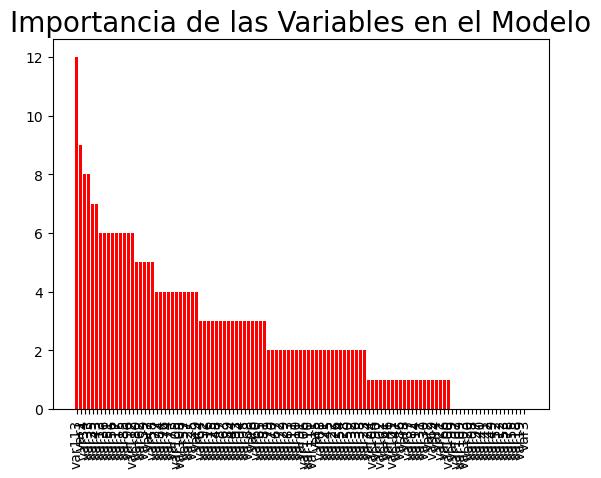

In [48]:
import matplotlib.pyplot as plt
plt.bar(x=importances['Variable'], height=importances['Importancia'], color='#FF0000')
plt.title('Importancia de las Variables en el Modelo', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
calificacion=NRappi.drop("IMPAGADOR", axis=1)
probabilidades = mod.predict(calificacion)
columna=["PI"]
df_PI=pd.DataFrame(probabilidades[:],columns=columna)
df_PI

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


,PI
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
51656,1.0
51657,0.0
51658,0.0
51659,0.0


In [50]:
target=pd.DataFrame(NRappi["IMPAGADOR"])
Rappi_Final = pd.concat([target,df_PI],axis=1)
Rappi_Final

,IMPAGADOR,PI
0,0.0,1.0
1,0.0,1.0
2,1.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
51656,0.0,1.0
51657,1.0,0.0
51658,0.0,0.0
51659,0.0,0.0


In [51]:
print(tabla_distribucion_variable(Rappi_Final,"IMPAGADOR")) #Distribución de buenos y malos

  IMPAGADOR  frecuencia  frecuencia acumulada
0       0.0     0.84288               0.84288
1       1.0     0.15712               1.00000
2   Ausente     0.00000               1.00000


C:\Users\MARILYN\AppData\Local\Temp\ipykernel_94600\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
